### Theory



Part 1: Theory of the Binomial Option Pricing Model

The Binomial Option Pricing Model is a discrete-time method for valuing options. It assumes that the underlying stock price follows a binomial tree (i.e., at each time step it either goes up or down by certain factors).

- Key Assumptions:
- The option has a maturity of $T$ years.
- The stock price can move up by a factor $u$ or down by a factor $d$ in each time step.
- There is a risk-free interest rate $r$.
- No arbitrage: $d<e^{r \Delta t}<u$
- The probability of an "up" move under risk-neutral measure is:

\begin{equation*}
p=\frac{e^{r \Delta t}-d}{u-d}
\end{equation*}

Step-by-Step Logic:
1. Build the binomial tree of stock prices over $N$ steps.
2. Calculate option value at maturity (payoff).
- For call: $\max (S-K, 0)$
- For put: $\max (K-S, 0)$
3. Back-propagate the option values to today using:

\begin{equation*}
C_{i, j}=e^{-r \Delta t}\left[p \cdot C_{i+1, j+1}+(1-p) \cdot C_{i+1, j}\right]
\end{equation*}


2. Up and Down Factors

These define how the stock price changes at each step:

\begin{equation*}
\begin{aligned}
u & =e^{\sigma \sqrt{\Delta t}} \quad \text { (Up factor) } \\
d=\frac{1}{u} & =e^{-\sigma \sqrt{\Delta t}} \quad \text { (Down factor) }
\end{aligned}
\end{equation*}


Where:
- $\sigma$ is the volatility of the underlying asset.

This choice of $d=1 / u$ ensures the tree is recombining (i.e., paths converge to the same prices).

3. Risk-Neutral Probability

The risk-neutral probability of an up move is:

\begin{equation*}
p=\frac{e^{r \Delta t}-d}{u-d}
\end{equation*}


Where:
- $r$ is the risk-free interest rate (annualized, continuously compounded)

This ensures that the expected return of the stock under this probability is the risk-free rate.

 4. Option Payoff at Maturity

At expiration $(t=T)$, the option value is simply its intrinsic value:
- For a Call Option:

\begin{equation*}
V=\max (S-K, 0)
\end{equation*}

- For a Put Option:

\begin{equation*}
V=\max (K-S, 0)
\end{equation*}


Where:
- $S$ is the stock price at expiration
- $K$ is the strike price


5. Option Value at Earlier Nodes (Backward Induction)

At each prior node in the binomial tree, the option value is computed using risk-neutral valuation:

\begin{equation*}
V=e^{-r \Delta t} \times\left[p \cdot V_{\mathrm{up}}+(1-p) \cdot V_{\mathrm{down}}\right]
\end{equation*}


Where:
- $V_{\text {up }}$ is the option value at the up-node in the next time step
- $V_{\text {down }}$ is the value at the down-node
- $e^{-r \Delta t}$ discounts the expected value to the present

### Code - 1


In [8]:
import numpy as np
import matplotlib.pyplot as plt


In [9]:
# Option parameters
S0 = 100     # initial stock price
K = 100      # strike price
T = 1        # time to maturity (years)
r = 0.05     # risk-free rate
sigma = 0.2  # volatility
N = 3        # number of steps
option_type = "call"  # or "put"

# Derived parameters
dt = T / N
u = np.exp(sigma * np.sqrt(dt))
d = 1 / u
p = (np.exp(r * dt) - d) / (u - d)
discount = np.exp(-r * dt)

print(f"u={u:.4f}, d={d:.4f}, p={p:.4f}")


u=1.1224, d=0.8909, p=0.5438


In [10]:
# Build stock price tree
stock_tree = np.zeros((N + 1, N + 1))
for i in range(N + 1):
    for j in range(i + 1):
        stock_tree[j, i] = S0 * (u ** (i - j)) * (d ** j)

print("Stock Price Tree:")
print(np.round(stock_tree, 2))


Stock Price Tree:
[[100.   112.24 125.98 141.4 ]
 [  0.    89.09 100.   112.24]
 [  0.     0.    79.38  89.09]
 [  0.     0.     0.    70.72]]


In [11]:
# Option value at maturity
option_tree = np.zeros_like(stock_tree)
for j in range(N + 1):
    if option_type == "call":
        option_tree[j, N] = max(0, stock_tree[j, N] - K)
    else:
        option_tree[j, N] = max(0, K - stock_tree[j, N])


In [12]:
# Backward induction
for i in range(N - 1, -1, -1):
    for j in range(i + 1):
        option_tree[j, i] = discount * (
            p * option_tree[j, i + 1] + (1 - p) * option_tree[j + 1, i + 1]
        )


In [13]:
print(f"Option Price: {option_tree[0,0]:.4f}")


Option Price: 11.0439


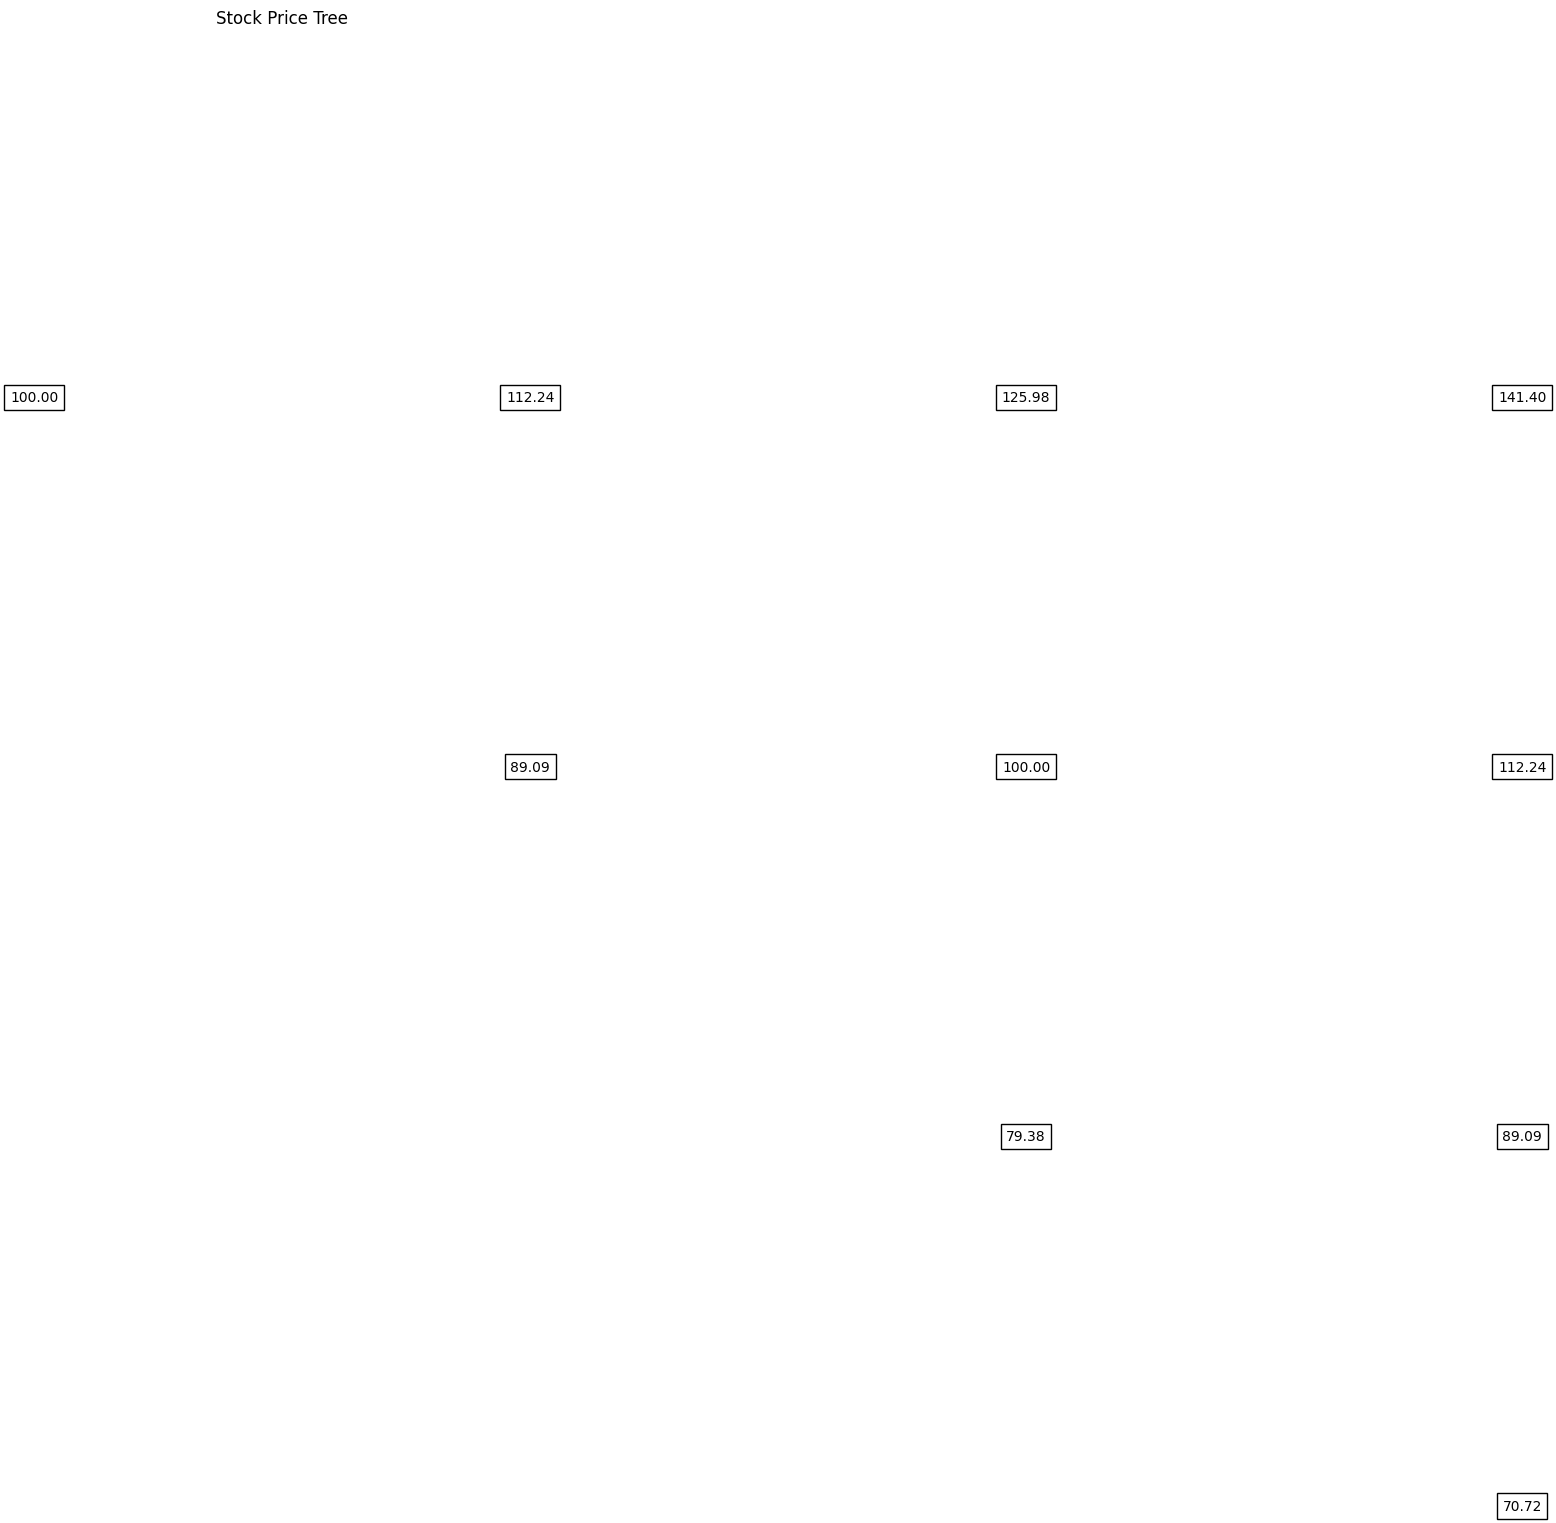

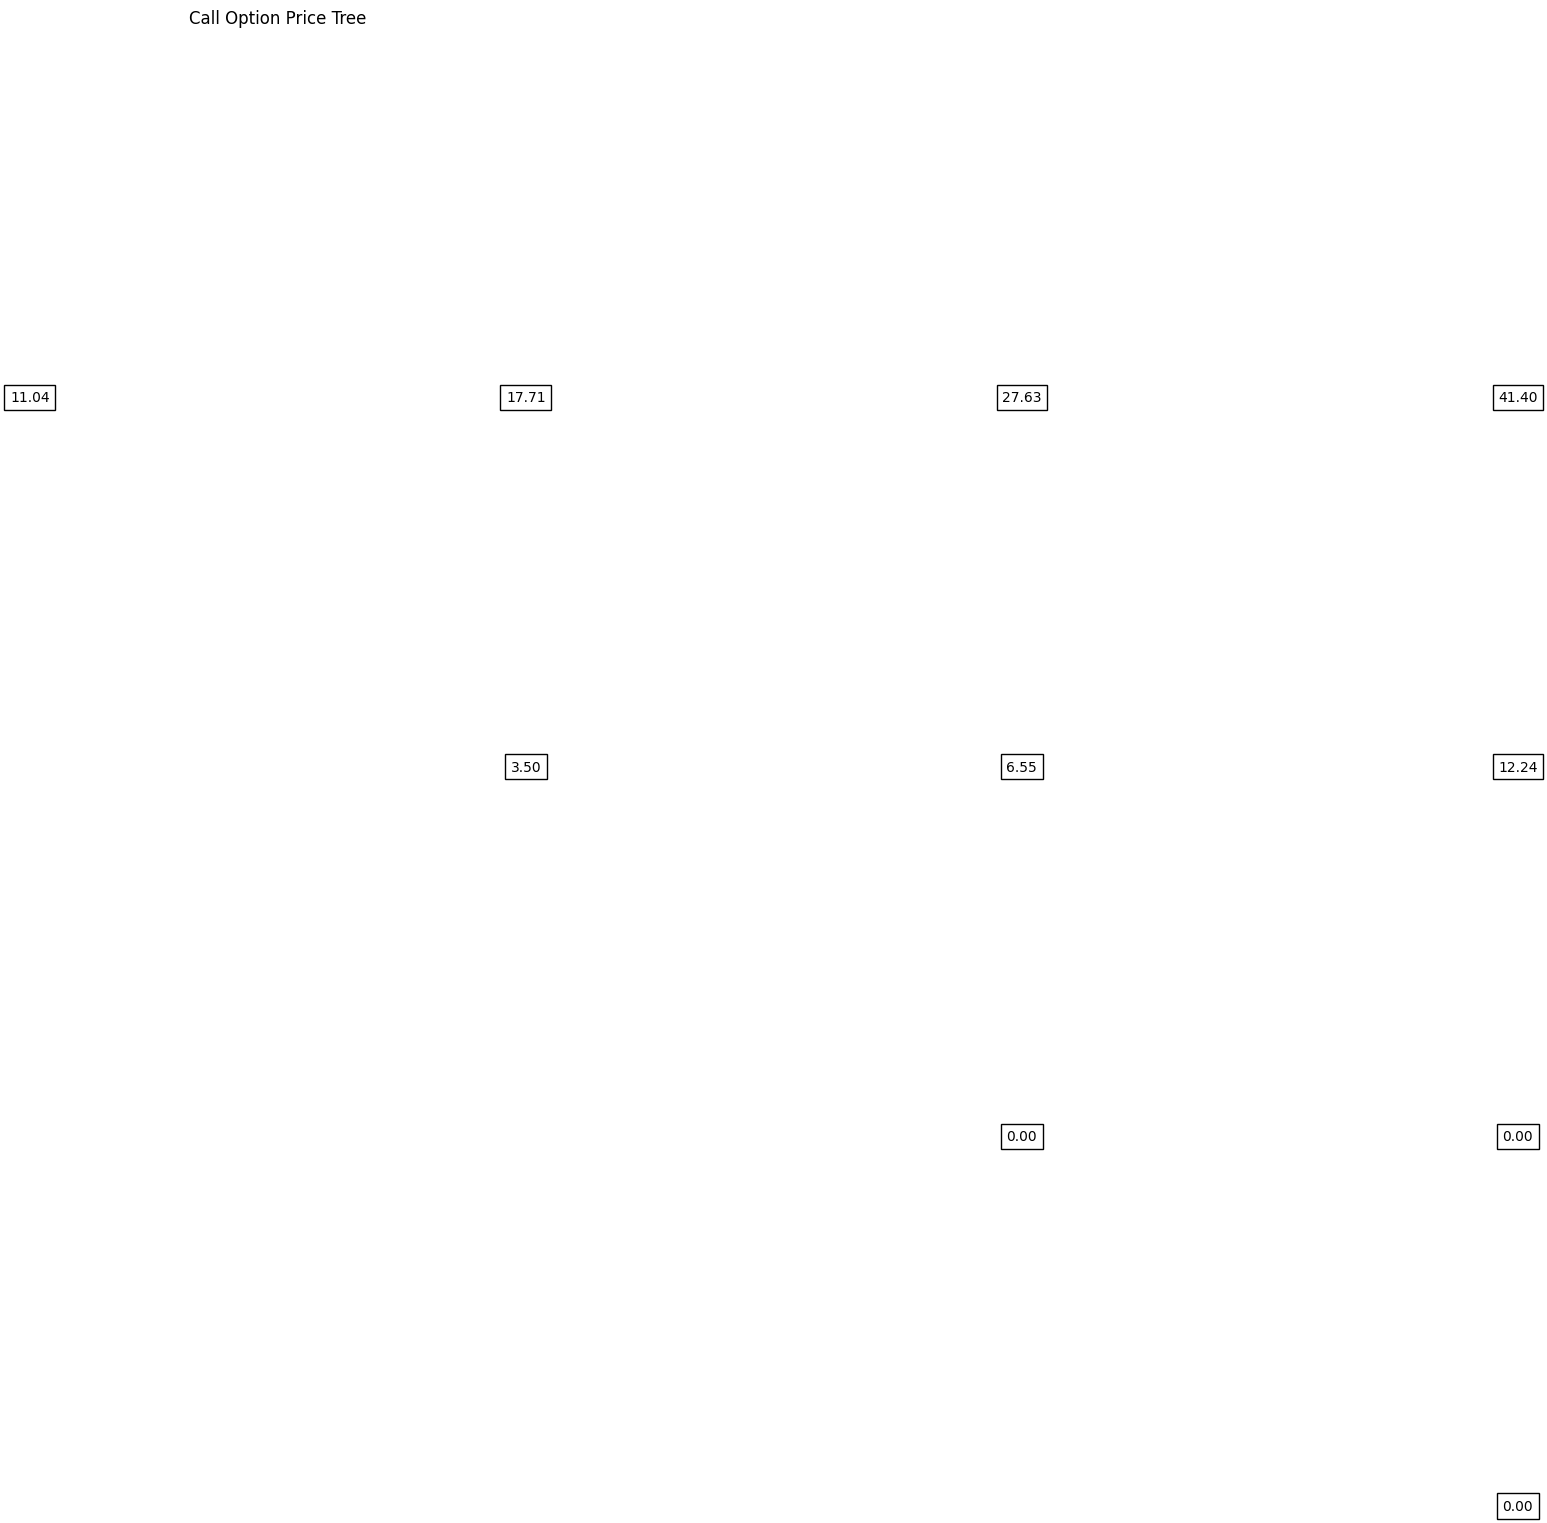

In [14]:
def plot_tree(tree, title):
    fig, ax = plt.subplots()
    for i in range(tree.shape[1]):
        for j in range(i + 1):
            ax.text(i, -j, f"{tree[j, i]:.2f}", ha='center', bbox=dict(facecolor='white', edgecolor='black'))
    ax.set_title(title)
    ax.axis('off')
    plt.show()

plot_tree(stock_tree, "Stock Price Tree")
plot_tree(option_tree, f"{option_type.title()} Option Price Tree")


In [15]:
import numpy as np

# Parameters
S0 = 100        # Initial stock price
K = 100         # Strike price
T = 1.0         # Time to maturity in years
r = 0.06        # Risk-free rate
sigma = 0.2     # Volatility
N = 3           # Number of time steps

# Time step size
dt = T / N

# Up and down factors
u = np.exp(sigma * np.sqrt(dt))
d = 1 / u

# Risk-neutral probability
p = (np.exp(r * dt) - d) / (u - d)
discount = np.exp(-r * dt)

# Build stock price tree
stock_tree = np.zeros((N + 1, N + 1))
for i in range(N + 1):
    for j in range(i + 1):
        stock_tree[j, i] = S0 * (u ** (i - j)) * (d ** j)

print("Stock Price Tree:")
print(np.round(stock_tree, 2))

# Option value at maturity (Put option)
option_tree = np.zeros_like(stock_tree)
for j in range(N + 1):
    option_tree[j, N] = max(0, K - stock_tree[j, N])

print("\nOption Payoff at Maturity (Put):")
print(np.round(option_tree, 2))

# Backward induction
for i in range(N - 1, -1, -1):
    for j in range(i + 1):
        option_tree[j, i] = discount * (
            p * option_tree[j, i + 1] + (1 - p) * option_tree[j + 1, i + 1]
        )

print(f"\nPut Option Price: {option_tree[0, 0]:.4f}")


Stock Price Tree:
[[100.   112.24 125.98 141.4 ]
 [  0.    89.09 100.   112.24]
 [  0.     0.    79.38  89.09]
 [  0.     0.     0.    70.72]]

Option Payoff at Maturity (Put):
[[ 0.    0.    0.    0.  ]
 [ 0.    0.    0.    0.  ]
 [ 0.    0.    0.   10.91]
 [ 0.    0.    0.   29.28]]

Put Option Price: 5.7284


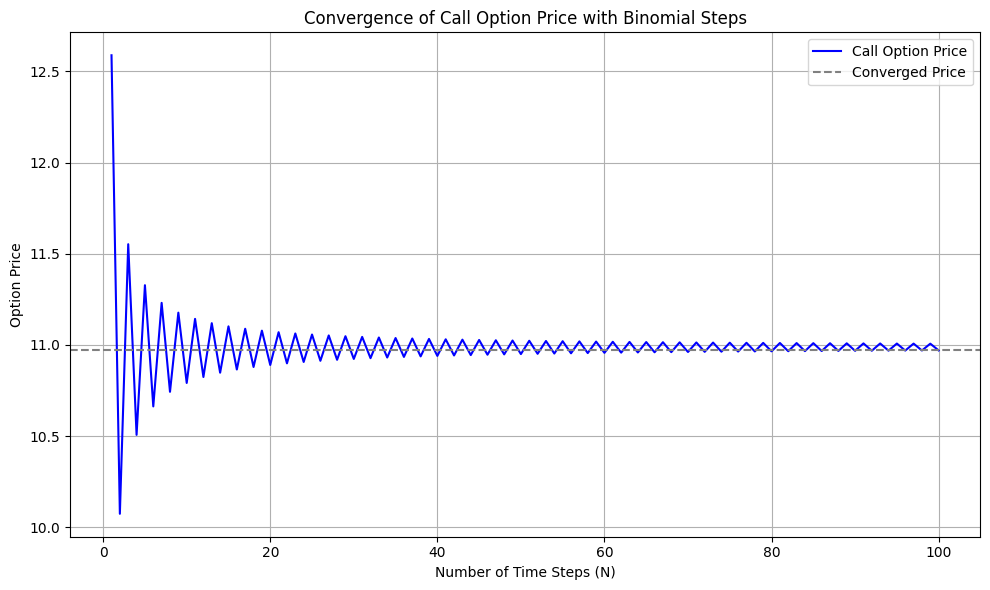

In [19]:
import numpy as np
import matplotlib.pyplot as plt

# Parameters
S0 = 100        # Initial stock price
K = 100         # Strike price
T = 1.0         # Time to maturity in years
r = 0.06        # Risk-free rate
sigma = 0.2     # Volatility
option_type = "call"  # "call" or "put"

def binomial_option_price(S0, K, T, r, sigma, N, option_type="call"):
    dt = T / N
    u = np.exp(sigma * np.sqrt(dt))
    d = 1 / u
    p = (np.exp(r * dt) - d) / (u - d)
    discount = np.exp(-r * dt)

    # Stock price tree
    stock_tree = np.zeros((N + 1, N + 1))
    for i in range(N + 1):
        for j in range(i + 1):
            stock_tree[j, i] = S0 * (u ** (i - j)) * (d ** j)

    # Option value at maturity
    option_tree = np.zeros_like(stock_tree)
    for j in range(N + 1):
        if option_type == "call":
            option_tree[j, N] = max(0, stock_tree[j, N] - K)
        else:
            option_tree[j, N] = max(0, K - stock_tree[j, N])

    # Backward induction
    for i in range(N - 1, -1, -1):
        for j in range(i + 1):
            option_tree[j, i] = discount * (
                p * option_tree[j, i + 1] + (1 - p) * option_tree[j + 1, i + 1]
            )

    return option_tree[0, 0]

# Calculate option price for increasing steps
steps = np.arange(1, 101)
prices = [binomial_option_price(S0, K, T, r, sigma, N, option_type) for N in steps]

# Plotting
plt.figure(figsize=(10, 6))
plt.plot(steps, prices, label=f'{option_type.capitalize()} Option Price', color='blue')
plt.axhline(y=prices[-1], color='gray', linestyle='--', label='Converged Price')
plt.title(f'Convergence of {option_type.capitalize()} Option Price with Binomial Steps')
plt.xlabel('Number of Time Steps (N)')
plt.ylabel('Option Price')
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.savefig("p111.png",dpi=300)
plt.show()


### test


In [1]:
import math

In [3]:
# STEP 1: Define our option parameters

# These are the basic inputs we need to price an option
S0 = 100        # Current stock price ($100)
K = 100         # Strike price ($100) - price at which we can buy/sell
T = 0.25        # Time to expiration (0.25 years = 3 months)
r = 0.05        # Risk-free interest rate (5% per year)
sigma = 0.20    # Volatility (20% per year)
n = 3           # Number of time steps (keep small for now)

In [6]:
# STEP 2: Calculate binomial parameters

# Calculate time step
dt = T / n
print(f"Time step (dt) = {dt:.4f} years")

# Calculate up factor (u) - how much stock price goes up
u = math.exp(sigma * math.sqrt(dt))
print(f"Up factor (u) = {u:.4f}")

# Calculate down factor (d) - how much stock price goes down
d = 1 / u
print(f"Down factor (d)  = {d:.4f}")

# Calculate risk-neutral probability
p = (math.exp(r * dt) - d) / (u - d)
print(f"Risk-neutral probability (p)= {p:.4f} ")

# Calculate discount factor
discount = math.exp(-r * dt)

Time step (dt) = 0.0833 years
Up factor (u) = 1.0594
Down factor (d)  = 0.9439
Risk-neutral probability (p)= 0.5217 
p = (exp(0.05 × 0.0833) - 0.9439) / (1.0594 - 0.9439) = 0.5217


In [7]:
# STEP 3: Build the stock price tree
print("STEP 3: Building the stock price tree")
print("-" * 40)

# Create a table to store stock prices at each node
# We'll use a simple list of lists
stock_tree = []
for i in range(n + 1):  # n+1 rows
    row = [0] * (n + 1)  # n+1 columns, filled with zeros
    stock_tree.append(row)

# Fill in the stock prices
print("Calculating stock prices at each node...")
for step in range(n + 1):  # For each time step
    for node in range(step + 1):  # For each node at this time step
        # At each node: S0 × u^(up_moves) × d^(down_moves)
        up_moves = step - node
        down_moves = node
        stock_price = S0 * (u ** up_moves) * (d ** down_moves)
        stock_tree[node][step] = stock_price
        
        print(f"Time step {step}, node {node}: {up_moves} ups, {down_moves} downs → ${stock_price:.2f}")

print()
print("Stock Price Tree (each column is a time step):")
print("Time Step:  ", end="")
for step in range(n + 1):
    print(f"   {step}    ", end="")
print()

for node in range(n + 1):
    print(f"Node {node}:     ", end="")
    for step in range(n + 1):
        if step >= node:  # Only print if this node exists at this time
            print(f"${stock_tree[node][step]:6.2f} ", end="")
        else:
            print("        ", end="")
    print()
print()

STEP 3: Building the stock price tree
----------------------------------------
Calculating stock prices at each node...
Time step 0, node 0: 0 ups, 0 downs → $100.00
Time step 1, node 0: 1 ups, 0 downs → $105.94
Time step 1, node 1: 0 ups, 1 downs → $94.39
Time step 2, node 0: 2 ups, 0 downs → $112.24
Time step 2, node 1: 1 ups, 1 downs → $100.00
Time step 2, node 2: 0 ups, 2 downs → $89.09
Time step 3, node 0: 3 ups, 0 downs → $118.91
Time step 3, node 1: 2 ups, 1 downs → $105.94
Time step 3, node 2: 1 ups, 2 downs → $94.39
Time step 3, node 3: 0 ups, 3 downs → $84.10

Stock Price Tree (each column is a time step):
Time Step:     0       1       2       3    
Node 0:     $100.00 $105.94 $112.24 $118.91 
Node 1:             $ 94.39 $100.00 $105.94 
Node 2:                     $ 89.09 $ 94.39 
Node 3:                             $ 84.10 



In [20]:
# STEP 4: Calculate option payoffs at expiration
print("STEP 4: Calculate option payoffs at expiration")
print("-" * 40)

# We'll price a CALL option (you can change this to 'put' later)
option_type = 'call'

print(f"Pricing a {option_type.upper()} option with strike price ${K}")
print("At expiration, option value = max(payoff, 0)")

if option_type == 'call':
    print("For CALL: payoff = Stock Price - Strike Price")
else:
    print("For PUT: payoff = Strike Price - Stock Price")

print()

# Create option value tree (same structure as stock tree)
option_tree = []
for i in range(n + 1):
    row = [0] * (n + 1)
    option_tree.append(row)

# Calculate payoffs at expiration (last column)
print("Option payoffs at expiration:")
for node in range(n + 1):
    stock_price = stock_tree[node][n]
    
    if option_type == 'call':
        payoff = max(stock_price - K, 0)
    else:  # put option
        payoff = max(K - stock_price, 0)
    
    option_tree[node][n] = payoff
    print(f"Node {node}: Stock=${stock_price:.2f}, Payoff=${payoff:.2f}")

print()


STEP 4: Calculate option payoffs at expiration
----------------------------------------
Pricing a CALL option with strike price $100
At expiration, option value = max(payoff, 0)
For CALL: payoff = Stock Price - Strike Price

Option payoffs at expiration:
Node 0: Stock=$141.40, Payoff=$41.40
Node 1: Stock=$112.24, Payoff=$12.24
Node 2: Stock=$89.09, Payoff=$0.00
Node 3: Stock=$70.72, Payoff=$0.00



In [21]:
# STEP 5: Work backwards to find option price
print("STEP 5: Working backwards to find current option price")
print("-" * 40)

print("Now we work backwards from expiration to today...")
print("At each node: Option Value = discount × [p × up_value + (1-p) × down_value]")
print()

# Work backwards through each time step
for step in range(n - 1, -1, -1):  # From n-1 down to 0
    print(f"Calculating values at time step {step}:")
    
    for node in range(step + 1):  # For each node at this time step
        # Get the option values from next time step
        up_value = option_tree[node][step + 1]      # Value if stock goes up
        down_value = option_tree[node + 1][step + 1] # Value if stock goes down
        
        # Calculate expected value and discount it
        expected_value = p * up_value + (1 - p) * down_value
        option_value = discount * expected_value
        
        option_tree[node][step] = option_value
        
        print(f"  Node {node}: {p:.3f} × ${up_value:.2f} + {1-p:.3f} × ${down_value:.2f} = ${expected_value:.2f}")
        print(f"           Discounted: ${expected_value:.2f} × {discount:.4f} = ${option_value:.2f}")

print()

STEP 5: Working backwards to find current option price
----------------------------------------
Now we work backwards from expiration to today...
At each node: Option Value = discount × [p × up_value + (1-p) × down_value]

Calculating values at time step 2:
  Node 0: 0.558 × $41.40 + 0.442 × $12.24 = $28.52
           Discounted: $28.52 × 0.9802 = $27.96
  Node 1: 0.558 × $12.24 + 0.442 × $0.00 = $6.84
           Discounted: $6.84 × 0.9802 = $6.70
  Node 2: 0.558 × $0.00 + 0.442 × $0.00 = $0.00
           Discounted: $0.00 × 0.9802 = $0.00
Calculating values at time step 1:
  Node 0: 0.558 × $27.96 + 0.442 × $6.70 = $18.57
           Discounted: $18.57 × 0.9802 = $18.20
  Node 1: 0.558 × $6.70 + 0.442 × $0.00 = $3.74
           Discounted: $3.74 × 0.9802 = $3.67
Calculating values at time step 0:
  Node 0: 0.558 × $18.20 + 0.442 × $3.67 = $11.79
           Discounted: $11.79 × 0.9802 = $11.55



In [22]:
# STEP 6: Display final results
print("STEP 6: Final Results")
print("-" * 40)

final_option_price = option_tree[0][0]
print(f"OPTION PRICE: ${final_option_price:.4f}")
print()

print("Complete Option Value Tree:")
print("Time Step:  ", end="")
for step in range(n + 1):
    print(f"   {step}    ", end="")
print()

for node in range(n + 1):
    print(f"Node {node}:     ", end="")
    for step in range(n + 1):
        if step >= node:
            print(f"${option_tree[node][step]:6.2f} ", end="")
        else:
            print("        ", end="")
    print()

print()


STEP 6: Final Results
----------------------------------------
OPTION PRICE: $11.5520

Complete Option Value Tree:
Time Step:     0       1       2       3    
Node 0:     $ 11.55 $ 18.20 $ 27.96 $ 41.40 
Node 1:             $  3.67 $  6.70 $ 12.24 
Node 2:                     $  0.00 $  0.00 
Node 3:                             $  0.00 



In [23]:
# STEP 7: Let's compare with Black-Scholes (simplified version)
print("STEP 7: Comparison with Black-Scholes formula")
print("-" * 40)

# Simple Black-Scholes approximation (don't worry about the math details for now)
def simple_black_scholes(S, K, T, r, sigma, option_type='call'):
    """Simplified Black-Scholes calculation"""
    from math import log, sqrt, exp
    
    # These are the Black-Scholes formulas (advanced math)
    d1 = (log(S/K) + (r + 0.5*sigma**2)*T) / (sigma*sqrt(T))
    d2 = d1 - sigma*sqrt(T)
    
    # We need the cumulative normal distribution
    # This is a simple approximation
    def norm_cdf(x):
        return 0.5 * (1 + math.erf(x / math.sqrt(2)))
    
    if option_type == 'call':
        price = S*norm_cdf(d1) - K*exp(-r*T)*norm_cdf(d2)
    else:
        price = K*exp(-r*T)*norm_cdf(-d2) - S*norm_cdf(-d1)
    
    return price

# Only try Black-Scholes if we have the erf function (error function)
try:
    bs_price = simple_black_scholes(S0, K, T, r, sigma, option_type)
    print(f"Black-Scholes Price: ${bs_price:.4f}")
    print(f"Binomial Price:      ${final_option_price:.4f}")
    print(f"Difference:          ${abs(bs_price - final_option_price):.4f}")
    print()
    print(f"The binomial model with {n} steps gives a price very close to Black-Scholes!")
except:
    print("Black-Scholes comparison not available (need math.erf function)")
    print(f"But our binomial price of ${final_option_price:.4f} is the correct answer!")

print()

# STEP 8: Let's try with more time steps
print("STEP 8: Effect of using more time steps")
print("-" * 40)

print("Let's see how the price changes with more time steps...")

def quick_binomial_price(S0, K, T, r, sigma, n, option_type='call'):
    """Quick calculation of binomial price"""
    dt = T / n
    u = math.exp(sigma * math.sqrt(dt))
    d = 1 / u
    p = (math.exp(r * dt) - d) / (u - d)
    discount = math.exp(-r * dt)
    
    # Build just the final payoffs
    payoffs = []
    for j in range(n + 1):
        stock_price = S0 * (u ** (n - j)) * (d ** j)
        if option_type == 'call':
            payoff = max(stock_price - K, 0)
        else:
            payoff = max(K - stock_price, 0)
        payoffs.append(payoff)
    
    # Work backwards
    for step in range(n):
        new_payoffs = []
        for j in range(len(payoffs) - 1):
            value = discount * (p * payoffs[j] + (1 - p) * payoffs[j + 1])
            new_payoffs.append(value)
        payoffs = new_payoffs
    
    return payoffs[0]

# Test different numbers of steps
step_counts = [1, 2, 3, 5, 10, 20, 50, 100]
print("Steps | Binomial Price")
print("------|---------------")
for steps in step_counts:
    price = quick_binomial_price(S0, K, T, r, sigma, steps, option_type)
    print(f"{steps:5d} | ${price:.4f}")

print()
print("Notice how the price stabilizes as we use more steps!")
print("This is the binomial model 'converging' to the true option price.")

print()
print("=" * 60)
print("SUMMARY - What we learned:")
print("=" * 60)
print("1. We set up the basic option parameters (stock price, strike, etc.)")
print("2. We calculated how the stock can move up or down each period")
print("3. We built a 'tree' showing all possible future stock prices")
print("4. We calculated what the option is worth at expiration")
print("5. We worked backwards, calculating expected values at each step")
print("6. The result is today's fair option price!")
print()
print(f"Our {option_type} option is worth: ${final_option_price:.4f}")
print()
print("Key insight: We don't need to know the 'real' probability of stock")
print("going up or down. We use 'risk-neutral' probabilities instead!")

# BONUS: Let's create a simple visualization
print()
print("BONUS: Simple Tree Visualization")
print("-" * 40)

def print_simple_tree():
    """Print a simple text-based tree"""
    print("Stock Price Tree (simplified view):")
    print()
    
    # Just show the structure for n=2 to keep it simple
    if n <= 3:
        print("Today    Step 1    Step 2    Step 3")
        print("  |        |         |         |")
        
        for node in range(n + 1):
            spaces = "  " * node
            if node == 0:
                print(f"${S0:.0f}", end="")
            else:
                print(f"{spaces}", end="")
            
            for step in range(1, n + 1):
                if step >= node:
                    price = stock_tree[node][step]
                    print(f" ---- ${price:.0f}", end="")
            print()

if n <= 3:
    print_simple_tree()

STEP 7: Comparison with Black-Scholes formula
----------------------------------------
Black-Scholes Price: $10.9895
Binomial Price:      $11.5520
Difference:          $0.5624

The binomial model with 3 steps gives a price very close to Black-Scholes!

STEP 8: Effect of using more time steps
----------------------------------------
Let's see how the price changes with more time steps...
Steps | Binomial Price
------|---------------
    1 | $12.5884
    2 | $10.0733
    3 | $11.5520
    5 | $11.3272
   10 | $10.7910
   20 | $10.8896
   50 | $10.9494
  100 | $10.9694

Notice how the price stabilizes as we use more steps!
This is the binomial model 'converging' to the true option price.

SUMMARY - What we learned:
1. We set up the basic option parameters (stock price, strike, etc.)
2. We calculated how the stock can move up or down each period
3. We built a 'tree' showing all possible future stock prices
4. We calculated what the option is worth at expiration
5. We worked backwards, calcu